**Title of Project:**

Women Cloth Reviews Prediction with Multi Nomial Naïve Bayes

**Objective:**

Develop a predictive model using Multinomial naïve Bayes algorithm to classify women's clothing reviews into multiple categories based on their content and improve the accuracy of sales predictions and provide insights into the factors influencing sales performance.

**Data Source:**

The data for this project is sourced from the Kaggle Women Cloth Reviews Prediction dataset

**Import Libraries**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

**Import Dataset**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/ProjectHub-MachineLearning/main/Women%20Clothing%20E-Commerce%20Review.csv')

**Describe Data**

In [ ]:
df.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.describe()

,Clothing ID,Age,Rating,Recommended,Positive Feedback
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Clothing ID        23486 non-null  int64 
 1   Age                23486 non-null  int64 
 2   Title              19676 non-null  object
 3   Review             22641 non-null  object
 4   Rating             23486 non-null  int64 
 5   Recommended        23486 non-null  int64 
 6   Positive Feedback  23486 non-null  int64 
 7   Division           23472 non-null  object
 8   Department         23472 non-null  object
 9   Category           23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [ ]:
df.shape

(23486, 10)

**Data Visualization**

In [ ]:
from scipy import stats

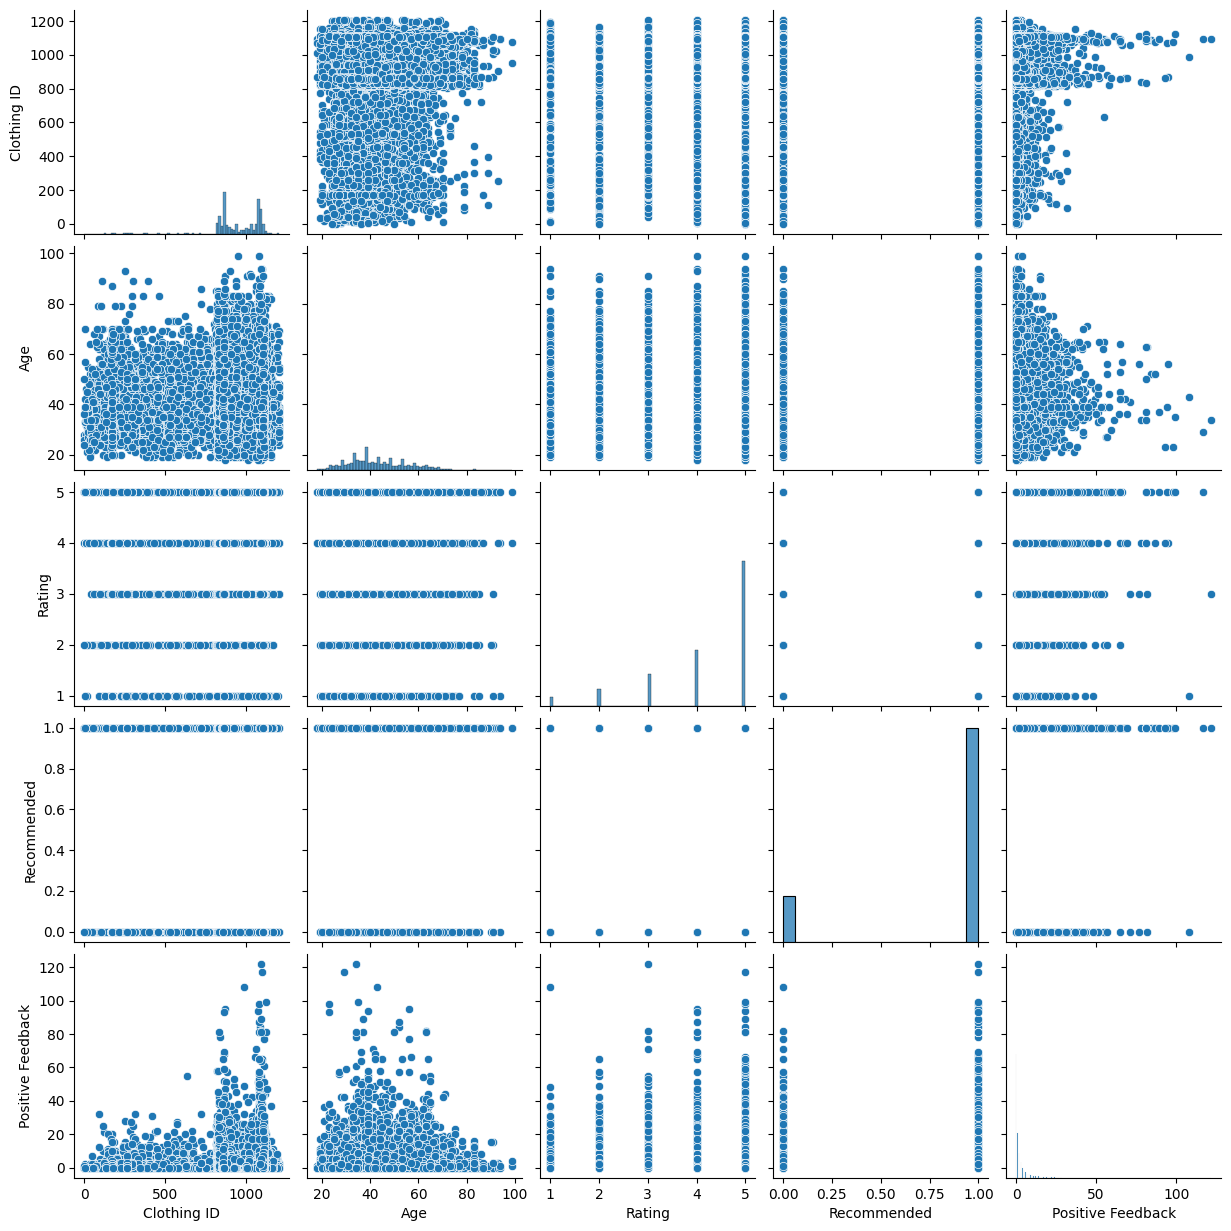

In [ ]:
sns.pairplot(df)

**Data Preprocessing**

In [ ]:
df.isnull().sum()

Clothing ID             0
Age                     0
Title                3810
Review                845
Rating                  0
Recommended             0
Positive Feedback       0
Division               14
Department             14
Category               14
dtype: int64

In [ ]:
df[df['Review']==""] = np.NaN

In [ ]:
df['Review'].fillna("No review", inplace=True)
df.isna().sum()

Clothing ID             0
Age                     0
Title                3810
Review                  0
Rating                  0
Recommended             0
Positive Feedback       0
Division               14
Department             14
Category               14
dtype: int64

In [ ]:
df['Review']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review, Length: 23486, dtype: object

In [ ]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review', 'Rating', 'Recommended',
       'Positive Feedback', 'Division', 'Department', 'Category'],
      dtype='object')

In [ ]:
df['Rating'].value_counts()

Rating
5    13131
4     5077
3     2871
2     1565
1      842
Name: count, dtype: int64

**Recategorizing ratings as Poor (0) and Good (1)**

In [ ]:
df.replace({'Rating': { 1:0, 2:0, 3:0, 4:1, 5:1 }}, inplace=True)

In [ ]:
df['Rating'].value_counts()

Rating
1    18208
0     5278
Name: count, dtype: int64

**Defining Target Variable (y) and Feature Variables (X)**

In [ ]:
x = df['Review']
y = df['Rating']

In [ ]:
x.sample(5)

9597     I love this dress.\nit is so cute!\ni have ano...
2101     This dress is beautiful in person. i am 5'1 an...
21134    These pants are extremely comfortable and flat...
21       I'm upset because for the price of the dress, ...
16916    I got this in peach, and am not ashamed to say...
Name: Review, dtype: object

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, stratify=y, random_state=2529)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16440,), (7046,), (16440,), (7046,))

**Getting Tokens from Feature Text**

Getting Tokens from Feature Text
Using CountVectorizer from sci-kit learn



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(lowercase=True, analyzer='word', ngram_range=(2, 3), stop_words='english', max_features=50000)

In [ ]:
x_train = cv.fit_transform(x_train)

In [ ]:
cv.get_feature_names_out()

array(['00 petite', '00 regular', '00p 0p', ..., 'zipper tried',
       'zipper wouldn', 'zippers buttons'], dtype=object)

In [ ]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_test = cv.fit_transform(x_test)

In [ ]:
cv.get_feature_names_out()

array(['00 big', '00 bought', '00 dresses', ..., 'zipper little tricky',
       'zippered pockets', 'zippers buttons'], dtype=object)

In [ ]:
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Model Training**

Using Multinomial Naïve Bayes algorithm, which is implemented in sci-kit as MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB()

In [ ]:
model.fit(x_train, y_train)

MultinomialNB()

**Model prediction**

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred.shape

(7046,)

In [ ]:
y_pred

array([1, 0, 0, ..., 1, 1, 0])

Getting probability of each predicted class

In [ ]:
model.predict_proba(x_test)

array([[0.35369349, 0.64630651],
       [0.77613702, 0.22386298],
       [0.53143725, 0.46856275],
       ...,
       [0.05012569, 0.94987431],
       [0.22475669, 0.77524331],
       [0.79599357, 0.20400643]])

**Model evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_test,y_pred)

0.4977292080613114

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[ 758  825]
 [2714 2749]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.48      0.30      1583
           1       0.77      0.50      0.61      5463

    accuracy                           0.50      7046
   macro avg       0.49      0.49      0.45      7046
weighted avg       0.65      0.50      0.54      7046



**Explanation**

This project revolves around constructing a prediction model. Initially, all necessary libraries and a test dataset are imported. The dataset undergoes evaluation and preprocessing to ready it for processing. Subsequently, a segment of the dataset is reserved for testing, while the remaining portion is utilized for model training. The model is then employed to generate a prediction dataset. Ultimately, the accuracy of predictions is assessed against the test dataset. Adjustments are made as necessary.
